In [2]:
from mpl_toolkits import mplot3d
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import os
import json

In [3]:
#help(plt.Axes.scatter)
path = os.path.abspath('')
# returns directory of the current file
print(path)
path = os.path.abspath('..\\')
# returns the parent directory of the current file
print(path)
path = os.path.abspath('..\\Code_for_the_robot')
# returns a directory contained within the parent directory of the current file
print(path)
path = os.path.abspath('..\\Code_for_the_robot\\..\\')
# returns the parent directory of the current file
print(path)

c:\Users\ander\OneDrive - UW\Robotics lab material\Robotics Control Code\Ben's Control Code\Rebuilding_Everything\Debugging Scripts
c:\Users\ander\OneDrive - UW\Robotics lab material\Robotics Control Code\Ben's Control Code\Rebuilding_Everything
c:\Users\ander\OneDrive - UW\Robotics lab material\Robotics Control Code\Ben's Control Code\Rebuilding_Everything\Code_for_the_robot
c:\Users\ander\OneDrive - UW\Robotics lab material\Robotics Control Code\Ben's Control Code\Rebuilding_Everything


In [4]:
path = os.path.abspath('..\\')

current_file = r"\Debugging Scripts\test_4.json"
path = path + current_file

# print(path)

with open(path, 'r') as infile:
    json_data = json.load(infile)

r_o_m = json_data["range of motion"]
resolution = json_data["resolution"]
point_mags = json_data["points"]
max_point = json_data["max_point"]


print(point_mags[0])

[[[0.0, 0.0, -10.0], [-50.0, -50.0, 0.0]], -150]


In [5]:
Zs = []
Rxs = []
Rys = []
mags = []

for p in point_mags:
    Zs.append(p[0][0][2])
    Rxs.append(p[0][1][0])
    Rys.append(p[0][1][1])
    mags.append(p[1])


10
-200
85833
85833


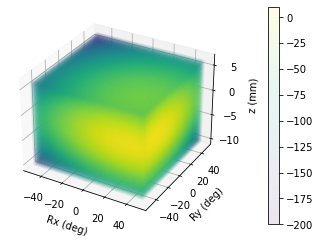

10


In [6]:
ax = plt.axes(projection='3d')

print(max(mags))
print(min(mags))

floor = min(mags)
span = max(mags) - floor
als = [round((i - floor) / (span * 2) * 256) for i in mags]
als = [i / 256 for i in als]
print(len(Rys))
print(len(Rxs))

fig = ax.scatter(Rxs, Rys, Zs, c=mags, cmap='viridis', alpha=0.1, linewidth=0.25)

ax.set_xlabel("Rx (deg)")
ax.set_ylabel("Ry (deg)")
ax.set_zlabel("z (mm)")

plt.colorbar(fig, pad=0.13)
# plt.savefig("fullscan_render.jpg", dpi=400)
plt.show()
# plt.axes(projection = "3d")
# plt.scatter(Rxs, Rys, Zs, c=mags, cmap='viridis', alpha=0.8, linewidth=0.5)


print(max(mags))


In [7]:
# Gonna find the set of Rxs and Rys corresponding only to the Z value found at the max point
# Then do the same for the other guys
r = dict()
active_rom = []
for DoF in r_o_m:
    r[DoF] = (r_o_m[DoF][1] - r_o_m[DoF][0]) / 2
    if r[DoF] != 0.0:
        active_rom.append(DoF)
print(active_rom)

indeces = {'X': (0,0), 'Y': (0,1), 'Z': (0,2), 'Rx': (1,0), 'Ry': (1,1), 'Rz': (1,2)}
points = np.array([[p[0][indeces[a][0]][indeces[a][1]] for a in active_rom] for p in point_mags])
magss = np.array([mags])
magss = magss.T

print(points.shape)
print(magss.shape)

np_point_mags = np.hstack((points,magss))
print(np_point_mags)

# "mps" stands for "max points," or all the points in Rx/Ry space that occur at the max
# value of Z, rotated for each of the other dimensions
zmps = np_point_mags[np_point_mags[:,0] == max_point[0][indeces['Z'][0]][indeces['Z'][1]]]
Rxmps = np_point_mags[np_point_mags[:,1] == max_point[0][indeces['Rx'][0]][indeces['Rx'][1]]]
Rymps = np_point_mags[np_point_mags[:,2] == max_point[0][indeces['Ry'][0]][indeces['Ry'][1]]]

print(zmps[:,1])


print(max_point)

['Z', 'Rx', 'Ry']
(85833, 3)
(85833, 1)
[[ -10.  -50.  -50. -150.]
 [ -10.  -50.  -48. -149.]
 [ -10.  -50.  -46. -148.]
 ...
 [   6.   50.   46.  -92.]
 [   6.   50.   48.  -95.]
 [   6.   50.   50.  -98.]]
[-50. -50. -50. ...  50.  50.  50.]
[[[0.0, 0.0, -1.5], [32.0, -28.0, 0.0]], 10]


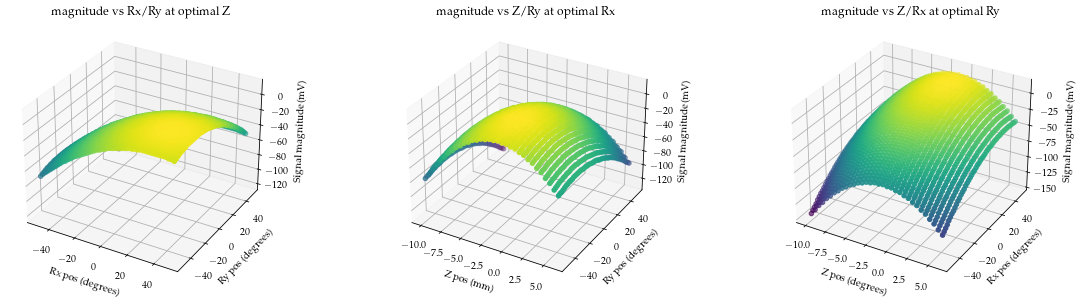

In [10]:
fig2 = plt.figure(figsize=(16,4), constrained_layout=True)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

tax = fig2.add_subplot(1,3,1, projection='3d')
tax.scatter(zmps[:,1], zmps[:,2], zmps[:,3],c=zmps[:,3], cmap='viridis')
tax.set_title("magnitude vs Rx/Ry at optimal Z")
tax.set_xlabel("Rx pos (degrees)")
tax.set_ylabel("Ry pos (degrees)")
tax.set_zlabel("Signal magnitude (mV)")

tax = fig2.add_subplot(1,3,2, projection='3d')
tax.scatter(Rxmps[:,0], Rxmps[:,2], Rxmps[:,3],c=Rxmps[:,3], cmap='viridis')
tax.set_title("magnitude vs Z/Ry at optimal Rx")
tax.set_xlabel("Z pos (mm)")
tax.set_ylabel("Ry pos (degrees)")
tax.set_zlabel("Signal magnitude (mV)")

tax = fig2.add_subplot(1,3,3, projection='3d')
tax.scatter(Rymps[:,0], Rymps[:,1], Rymps[:,3],c=Rymps[:,3], cmap='viridis')
tax.set_title("magnitude vs Z/Rx at optimal Ry")
tax.set_xlabel("Z pos (degrees)")
tax.set_ylabel("Rx pos (degrees)")
tax.set_zlabel("Signal magnitude (mV)")

plt.show()